Data Analysis

   id   x1   x2                                            x3  \
0   1   NO   NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1   2  NaN  NaN                                           NaN   
2   3   NO   NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3   4  YES   NO  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4   5   NO   NO  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139  0.481394   
1                                           NaN  0.000000  0.000000  0.000000   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422  0.935572   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  0.653912  0.041471  0.940787   
4  3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  1.415919  0.000000  1.000000   

         x8        x9  ... x136   x137  x138  x139 x140  x141  x142  x143  \
0  0.115697  0.472474  ...  0.0  0.810  3306 

TypeError: 'value' must be an instance of str or bytes, not a float

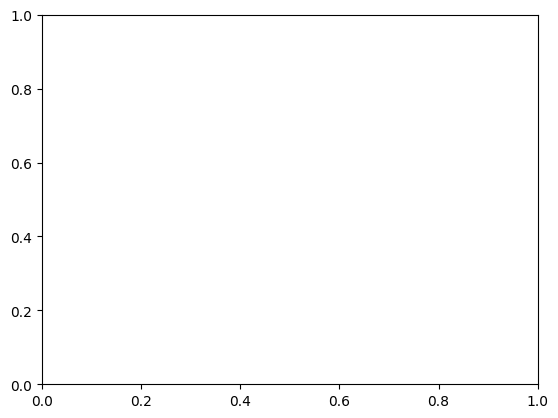

In [33]:
import pandas as pd

# Load train.csv for exploration
train_df = pd.read_csv("train.csv")

# Explore the data
print(train_df.head())
print(train_df.info())
print(train_df['x2'].value_counts())

# Visualize data distribution, if needed
import matplotlib.pyplot as plt
plt.hist(train_df["x2"])
plt.show()


Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split

# Preprocessing functions for text data (cleaning, tokenization, etc.)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['x2'], train_df['x2'], test_size=0.2, random_state=42)


Model Development

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load train and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Replace NaN values with empty strings in train and test data
train_df['x2'].fillna("", inplace=True)
test_df['NO'].fillna("", inplace=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['x2'], train_df['x2'], test_size=0.2, random_state=42)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF vectorizer to the training data
tfidf_vectorizer.fit(X_train)

# Define and train the model pipeline
model = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', LogisticRegression())
])

model.fit(X_train, y_train)

# Evaluate model performance on validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 1.0


C:\Users\priya\AppData\Local\Temp\ipykernel_9680\1743474000.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['x2'].fillna("", inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_9680\1743474000.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Model Evaluation

In [29]:
# Evaluate final model on test set
X_test = test_df['NO']

# Predict using trained model
test_predictions = model.predict(X_test)

Deployment

In [35]:
import joblib

joblib.dump(text_clf, "models/text_classification_model.pkl")

# Load the saved model for deployment
# model = joblib.load("models/text_classification_model.pkl")
# Use the loaded model to make predictions on new data


['models/text_classification_model.pkl']